## The dataset contains sales data for each month from different car manufacturers in India. The dataset contains data for the year range 2019 - 2021. Only the car manufacturers that have made a significant name in the Indian market have been considered in the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('Car Sales.csv')
df.head(5)

,Company,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Maruti Suzuki,2021,NaN,144761,146203.0,135879,32903,124280,133732,103187,63111,108991,109722,123016
1,Hyundai,2021,52005.0,51600,NaN,49002,25001,40496,48042,46866,33087,37021,37001,32312
2,Tata,2021,26980.0,27224,4355.0,25095,15181,24111,30184,28017,25729,33296,29780,35300
3,Mahindra,2021,42432.0,16702,16643.0,18285,8004,16636,20797,15786,12863,20034,19400,17476
4,Kia,2021,19056.0,15380,19100.0,16111,11050,15015,15016,16750,14441,16331,14214,7797


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  42 non-null     object 
 1   Year     42 non-null     int64  
 2   Jan      41 non-null     float64
 3   Feb      42 non-null     int64  
 4   Mar      41 non-null     float64
 5   Apr      42 non-null     int64  
 6   May      42 non-null     int64  
 7   Jun      42 non-null     int64  
 8   Jul      42 non-null     int64  
 9   Aug      42 non-null     int64  
 10  Sep      42 non-null     int64  
 11  Oct      42 non-null     int64  
 12  Nov      42 non-null     int64  
 13  Dec      42 non-null     int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 4.7+ KB


### From above figure we can see we have 1 null value in jan and Mar column each. To solve null value issue we can either insert value or remove the row that have null value.

In [29]:
# here we are using dropna to drop row with null value in Mar column. hyundai row will be removed
df = df.dropna(subset=['Mar'])

In [31]:
# here we are using mean to insert value in Jan column. mean value will be added in Jan column
mean_sale = df['Jan'].mean()
df['Jan'] = df['Jan'].fillna(mean_sale).astype(int)

In [27]:
df.head()

,Company,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Maruti Suzuki,2021,16577,144761,146203.0,135879,32903,124280,133732,103187,63111,108991,109722,123016
2,Tata,2021,26980,27224,4355.0,25095,15181,24111,30184,28017,25729,33296,29780,35300
3,Mahindra,2021,42432,16702,16643.0,18285,8004,16636,20797,15786,12863,20034,19400,17476
4,Kia,2021,19056,15380,19100.0,16111,11050,15015,15016,16750,14441,16331,14214,7797
5,Honda,2021,11320,9324,7103.0,9072,2032,4767,6055,11177,6765,8108,5457,7973


In [37]:
# Drop Dec column. The change is temperaory, to make it permanent we use inplace = True
df.drop(columns=['Dec']).head()

,Company,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
0,Maruti Suzuki,2021,16577,144761,146203.0,135879,32903,124280,133732,103187,63111,108991,109722
2,Tata,2021,26980,27224,4355.0,25095,15181,24111,30184,28017,25729,33296,29780
3,Mahindra,2021,42432,16702,16643.0,18285,8004,16636,20797,15786,12863,20034,19400
4,Kia,2021,19056,15380,19100.0,16111,11050,15015,15016,16750,14441,16331,14214
5,Honda,2021,11320,9324,7103.0,9072,2032,4767,6055,11177,6765,8108,5457


In [43]:
# rename column. its temperaroy.
df.rename(columns={'Dec':'Decemeber'}).head()

,Company,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Decemeber
0,Maruti Suzuki,2021,16577,144761,146203.0,135879,32903,124280,133732,103187,63111,108991,109722,123016
2,Tata,2021,26980,27224,4355.0,25095,15181,24111,30184,28017,25729,33296,29780,35300
3,Mahindra,2021,42432,16702,16643.0,18285,8004,16636,20797,15786,12863,20034,19400,17476
4,Kia,2021,19056,15380,19100.0,16111,11050,15015,15016,16750,14441,16331,14214,7797
5,Honda,2021,11320,9324,7103.0,9072,2032,4767,6055,11177,6765,8108,5457,7973


In [48]:
df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,2019.975610,16577.097561,18682.853659,16103.097561,11708.219512,8525.195122,13452.219512,15650.097561,15629.146341,16248.634146,20429.341463,18417.829268,17892.439024
std,0.821213,29864.538932,34898.874049,32150.772998,29097.189033,20076.367994,26243.184934,28638.435158,26806.236507,29417.341863,35928.561324,33295.784655,33339.796829
min,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,192.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,1500.000000,1304.000000,1401.000000,0.000000,710.000000,1398.000000,1962.000000,2018.000000,2550.000000,3065.000000,2392.000000,2550.000000
50%,2020.000000,5825.000000,7269.000000,5528.000000,1204.000000,1661.000000,4767.000000,5386.000000,6236.000000,7754.000000,10010.000000,6459.000000,6544.000000
75%,2021.000000,17272.000000,15380.000000,14997.000000,9621.000000,8004.000000,11419.000000,13103.000000,13147.000000,13967.000000,17923.000000,14240.000000,12785.000000
max,2021.000000,139843.000000,144761.000000,146203.000000,135879.000000,121012.000000,124280.000000,133732.000000,113033.000000,147912.000000,163656.000000,139133.000000,140754.000000


# Exploratory Data Analysis

In [65]:
# Group by Company and Year to get total sales
df['Total Sales'] = df.iloc[:, 2:].sum(axis=1)  # Sum all months
company_sales = df.groupby(['Company', 'Year'])['Total Sales'].sum().reset_index()
company_sales

,Company,Year,Total Sales
0,Ford,2019,294544.0
1,Ford,2020,183196.0
2,Ford,2021,133920.0
3,Honda,2019,538952.0
4,Honda,2020,282132.0
5,Honda,2021,356612.0
6,Hyundai,2019,2041040.0
7,Hyundai,2020,1694568.0
8,Jeep,2019,43740.0
9,Jeep,2020,20904.0


In [63]:
# total sales per year
total_sales_per_year = df.groupby('Year')['Total Sales'].sum().reset_index()
total_sales_per_year

,Year,Total Sales
0,2019,8691645.0
1,2020,7265952.0
2,2021,7328292.0


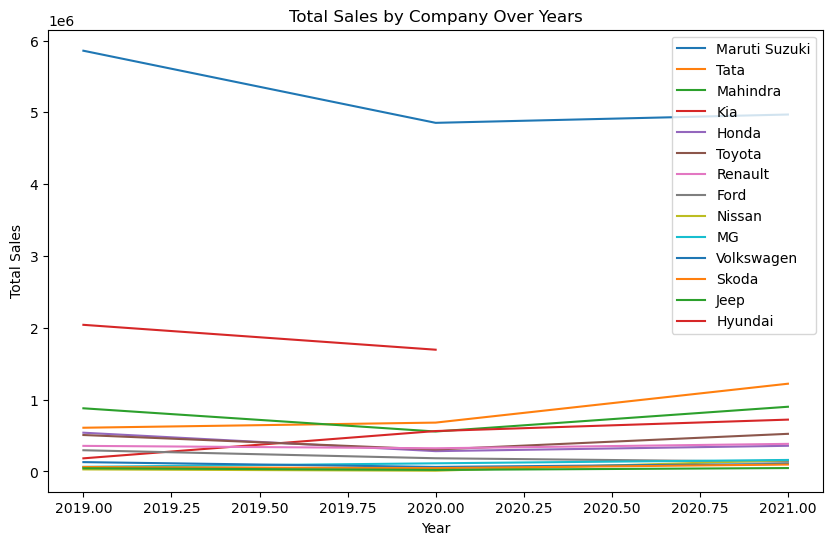

In [69]:
# Visualize data
plt.figure(figsize=(10, 6))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Total Sales'], label=company)

plt.title('Total Sales by Company Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [73]:
# Monthly trend analysis
monthly_columns = df.columns[2:14]
monthly_sales = df.groupby('Year')[monthly_columns].sum().T
monthly_sales

Year,2019,2020,2021
Jan,268153.0,260605.0,150903.0
Feb,259543.0,249461.0,256993.0
Mar,278516.0,139990.0,241721.0
Apr,242589.0,0.0,237448.0
May,235131.0,36272.0,78130.0
Jun,220426.0,116422.0,214693.0
Jul,198541.0,196916.0,246197.0
Aug,194671.0,233524.0,212600.0
Sep,221671.0,292161.0,152362.0
Oct,282868.0,332677.0,222058.0


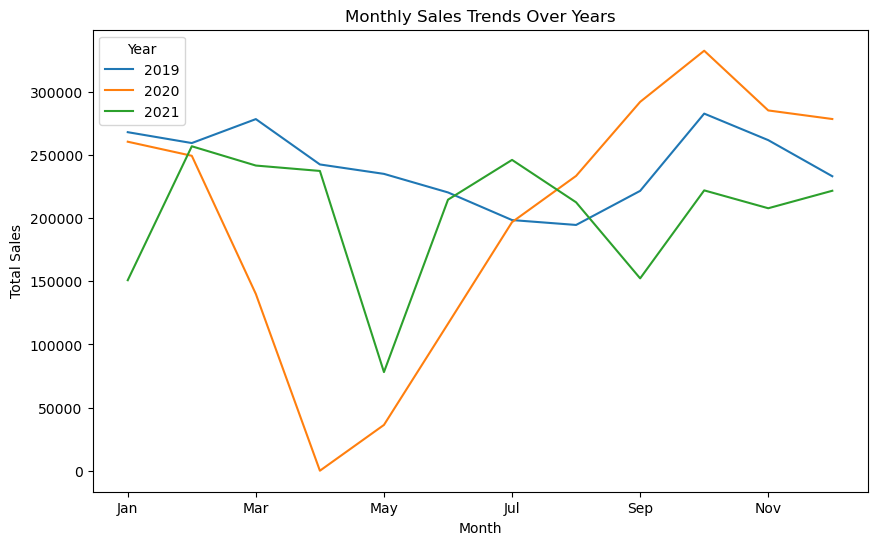

In [75]:
# Plot monthly sales trends over years
monthly_sales.plot(figsize=(10, 6))
plt.title('Monthly Sales Trends Over Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [85]:
# Calculate total sales for each company per year
# Sum sales across all months (assuming the months are in columns 3 to 14)
df['Total Sales'] = df.iloc[:, 2:14].sum(axis=1)

# Find the brand with the highest sales for each year
# Group by Year and use idxmax to find the company with the highest total sales per year
most_sales_per_year = df.loc[df.groupby('Year')['Total Sales'].idxmax()]

# Select relevant columns (Company, Year, Total Sales)
most_sales_per_year = most_sales_per_year[['Company', 'Year', 'Total Sales']]

print(most_sales_per_year)

          Company  Year  Total Sales
28  Maruti Suzuki  2019    1464450.0
14  Maruti Suzuki  2020    1213388.0
0   Maruti Suzuki  2021    1242362.0
